 #  A Whale off the Port(folio)
 ---

 In this project, I evaluate the performance among various (theoretical) algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, I read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, I combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data=Path("whale_returns.csv")
whale_returns_df=pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df=whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-01-04,0.000919,0.000157,-0.002002,-0.003865
2015-01-05,0.006051,0.002551,0.006526,0.009650
2015-01-06,0.002081,-0.000113,0.000837,0.002916
2015-01-07,-0.001365,0.002100,0.005815,-0.001304
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df=whale_returns_df.dropna().copy()
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
#Renamed the columns to the shorter names for easier data manipulation
whale_returns_df = whale_returns_df.rename(columns={
    "SOROS FUND MANAGEMENT LLC": "Soros", 
    "PAULSON & CO.INC. ": "Paulson", 
    "TIGER GLOBAL MANAGEMENT LLC": "Tiger", 
    "BERKSHIRE HATHAWAY INC": "Berkshire"}) 
whale_returns_df.head()

,Soros,Paulson,Tiger,Berkshire
Date,,,,
2015-01-04,0.000919,0.000157,-0.002002,-0.003865
2015-01-05,0.006051,0.002551,0.006526,0.009650
2015-01-06,0.002081,-0.000113,0.000837,0.002916
2015-01-07,-0.001365,0.002100,0.005815,-0.001304
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_data=Path("algo_returns.csv")
algo_returns_df=pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df=algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df=algo_returns_df.dropna().copy()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_data=Path("sp_tsx_history.csv")
sp_tsx_df=pd.read_csv(sp_tsx_history_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df=sp_tsx_df.sort_index()


In [10]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_df["Close"]=sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"]=sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype('float')
sp_tsx_df["Close"].dtype

dtype('float64')

In [12]:
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
# Calculate Daily Returns
sp_tsx_returns_df = sp_tsx_df.pct_change()
sp_tsx_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_returns_df = sp_tsx_returns_df.dropna().copy()
sp_tsx_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df=sp_tsx_returns_df.rename(columns={"Close": "S&P TSX 60"})
sp_tsx_returns_df.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_returns_df], axis="columns", join="inner")
combined_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-01-05,0.006051,0.002551,0.006526,0.009650,0.013712,-0.015621,-0.024465
2015-01-06,0.002081,-0.000113,0.000837,0.002916,0.002307,-0.011984,-0.010139
2015-01-07,-0.001365,0.002100,0.005815,-0.001304,0.003473,0.009418,0.002683
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577,-0.009436,-0.001881,-0.005035
2015-01-12,0.004271,0.010081,0.009055,0.010649,-0.019423,-0.002282,-0.008336


---

# Conduct Quantitative Analysis

In this section, I calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

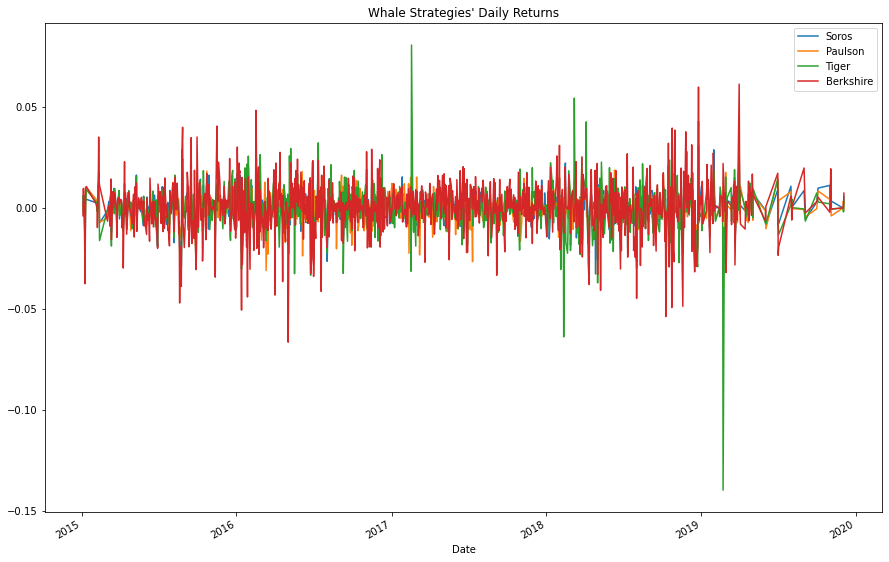

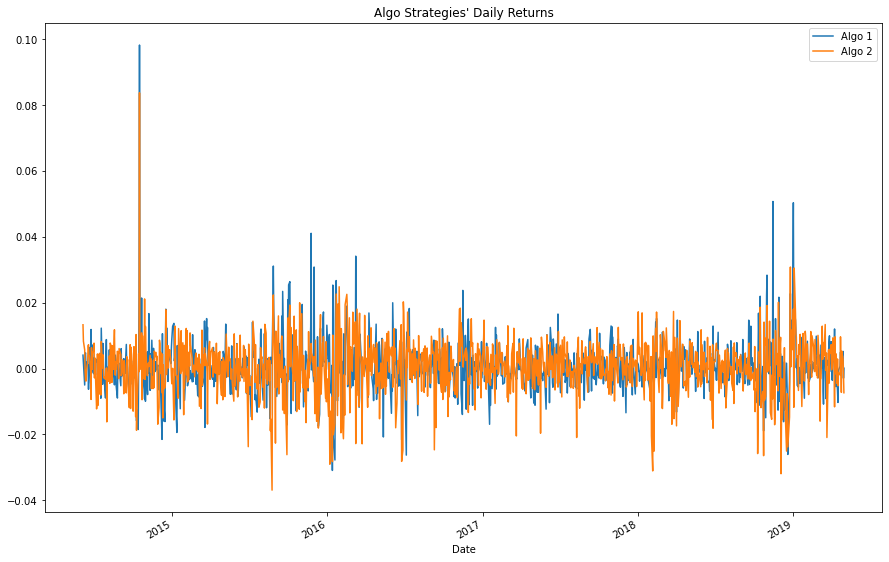

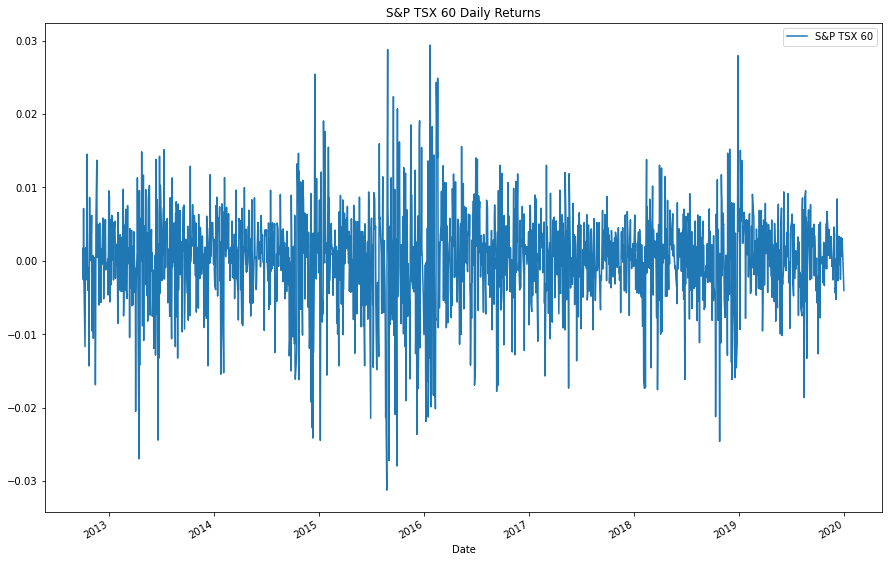

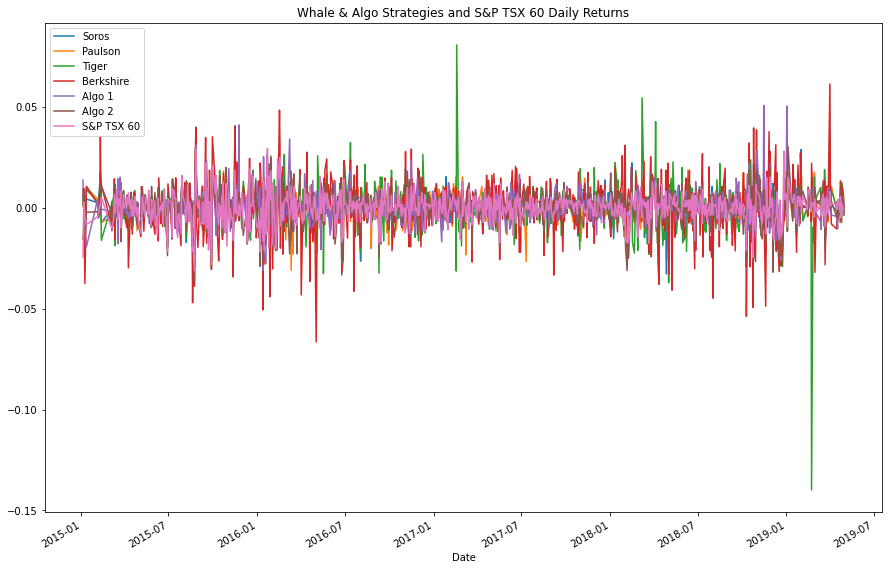

In [17]:
# Plot daily returns of all portfolios
whale_returns_df.plot(figsize=(15,10), title = "Whale Strategies' Daily Returns")
algo_returns_df.plot(figsize=(15, 10), title = "Algo Strategies' Daily Returns")
sp_tsx_returns_df.plot(figsize=(15,10), title = "S&P TSX 60 Daily Returns")
combined_returns.plot(figsize=(15,10), title = "Whale & Algo Strategies and S&P TSX 60 Daily Returns")

#### Calculate and Plot cumulative returns.

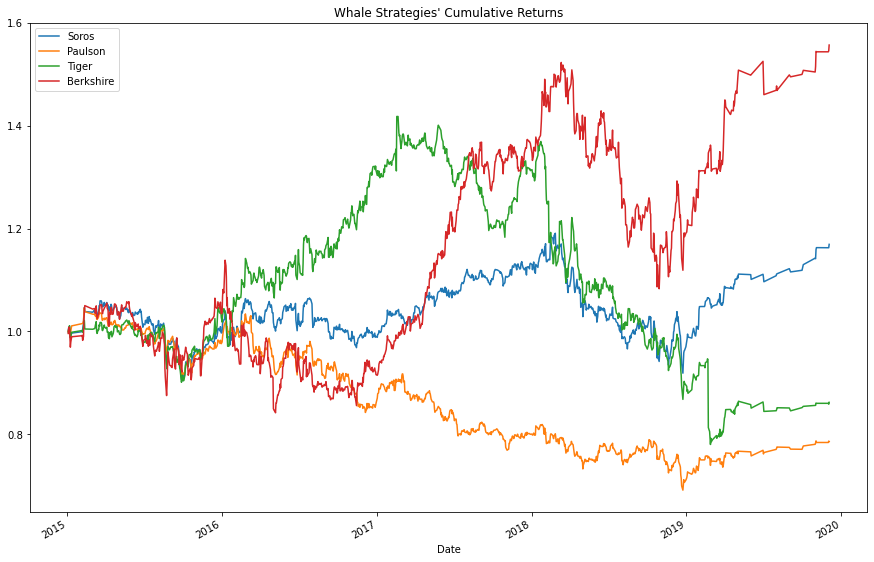

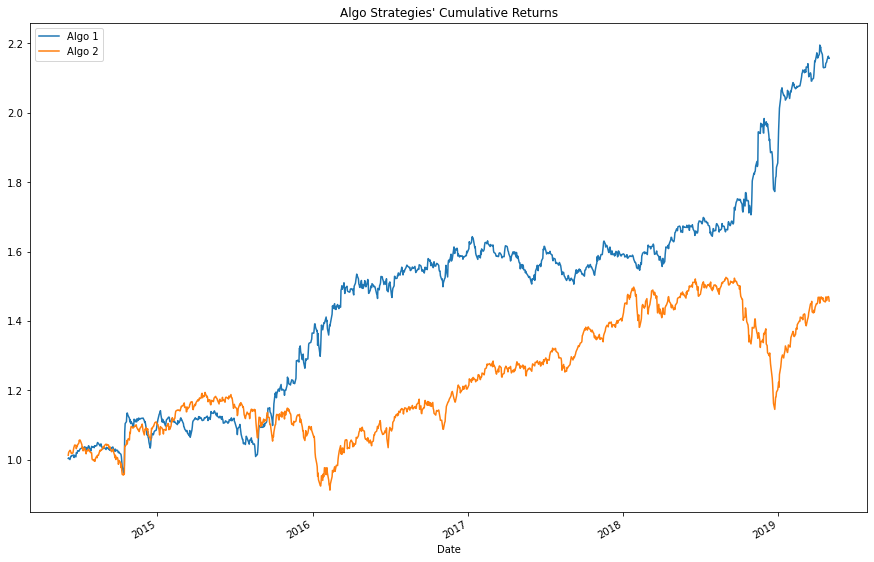

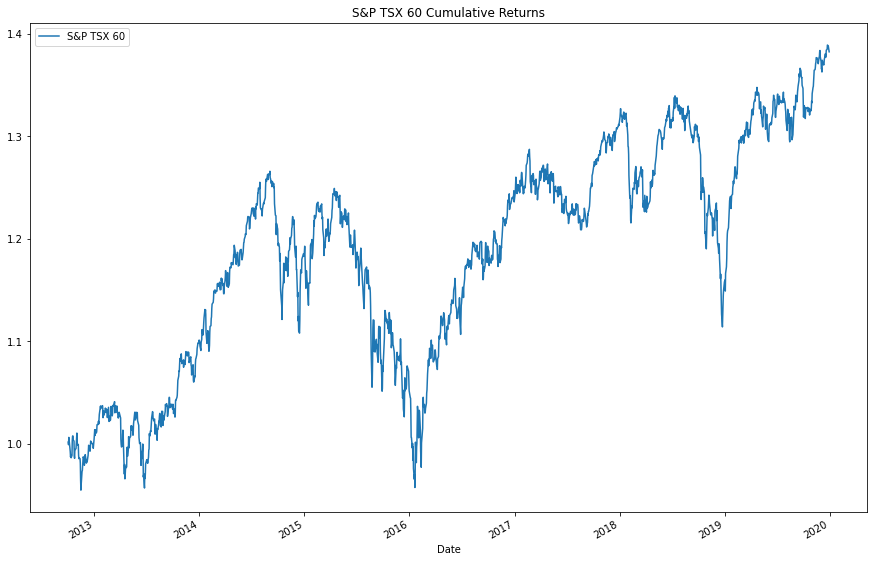

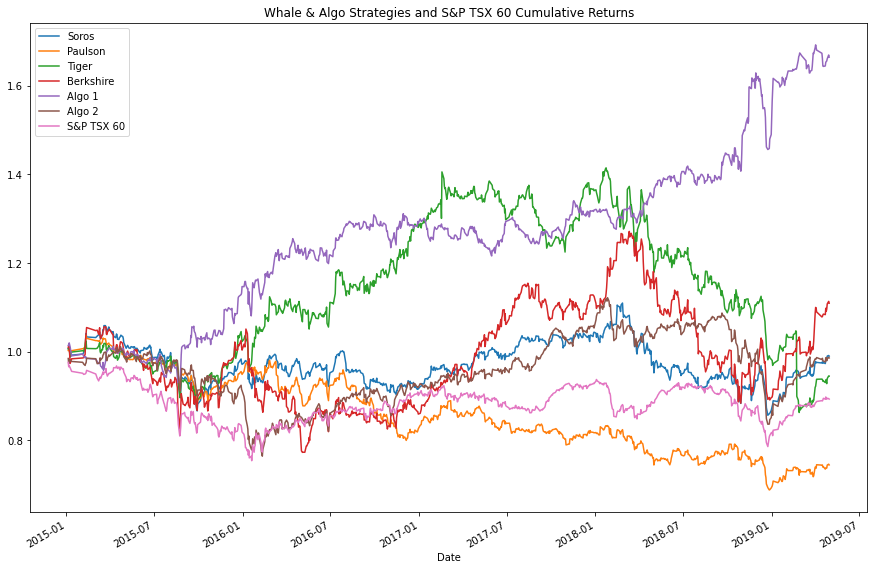

In [18]:
# Calculate cumulative returns of all portfolios
whale_cumulative_ret=(1+whale_returns_df).cumprod()
algo_cumulative_ret=(1+algo_returns_df).cumprod()
sp_tsx_cumulative_ret=(1+sp_tsx_returns_df).cumprod()
combined_cumulative_ret=(1+combined_returns).cumprod()
# Plot cumulative returns
whale_cumulative_ret.plot(figsize=(15,10), title = "Whale Strategies' Cumulative Returns")
algo_cumulative_ret.plot(figsize=(15,10), title = "Algo Strategies' Cumulative Returns")
sp_tsx_cumulative_ret.plot(figsize=(15,10), title = "S&P TSX 60 Cumulative Returns")
combined_cumulative_ret.plot(figsize=(15,10), title = "Whale & Algo Strategies and S&P TSX 60 Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


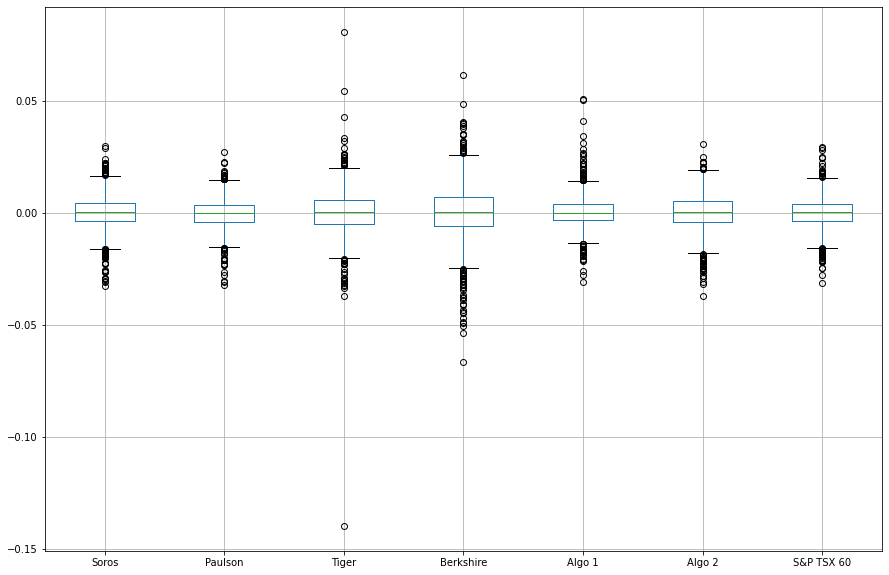

In [19]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(15,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_return_vol=combined_returns.std()
daily_return_vol.sort_values()

Paulson       0.006975
S&P TSX 60    0.007119
Algo 1        0.007606
Soros         0.007950
Algo 2        0.008370
Tiger         0.011085
Berkshire     0.013021
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
print(f"The Daily Standard Diviation of S&P TSX 60 Index is {round(daily_return_vol[6],5)}")
print(f"-----------------------------------------------------------")
# Determine which portfolios are riskier than the S&P TSX 60
print(f"Based on Daily Standard Diviation, the following portfolios are riskier than S&P TSX 60:")
print(f"- Algo 1 with Daily Standard Diviation at {round(daily_return_vol[4],5)}")
print(f"- Soros with Daily Standard Diviation at {round(daily_return_vol[0],5)}")
print(f"- Algo 2 with Daily Standard Diviation at {round(daily_return_vol[5],5)}")
print(f"- Tiger with Daily Standard Diviation at {round(daily_return_vol[2],5)}")
print(f"- Berkshire with Daily Standard Diviation at {round(daily_return_vol[3],5)}")


The Daily Standard Diviation of S&P TSX 60 Index is 0.00712
-----------------------------------------------------------
Based on Daily Standard Diviation, the following portfolios are riskier than S&P TSX 60:
- Algo 1 with Daily Standard Diviation at 0.00761
- Soros with Daily Standard Diviation at 0.00795
- Algo 2 with Daily Standard Diviation at 0.00837
- Tiger with Daily Standard Diviation at 0.01109
- Berkshire with Daily Standard Diviation at 0.01302


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
ann_return_vol=daily_return_vol * np.sqrt(252)
ann_return_vol.sort_values()

Paulson       0.110728
S&P TSX 60    0.113010
Algo 1        0.120744
Soros         0.126197
Algo 2        0.132877
Tiger         0.175974
Berkshire     0.206704
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

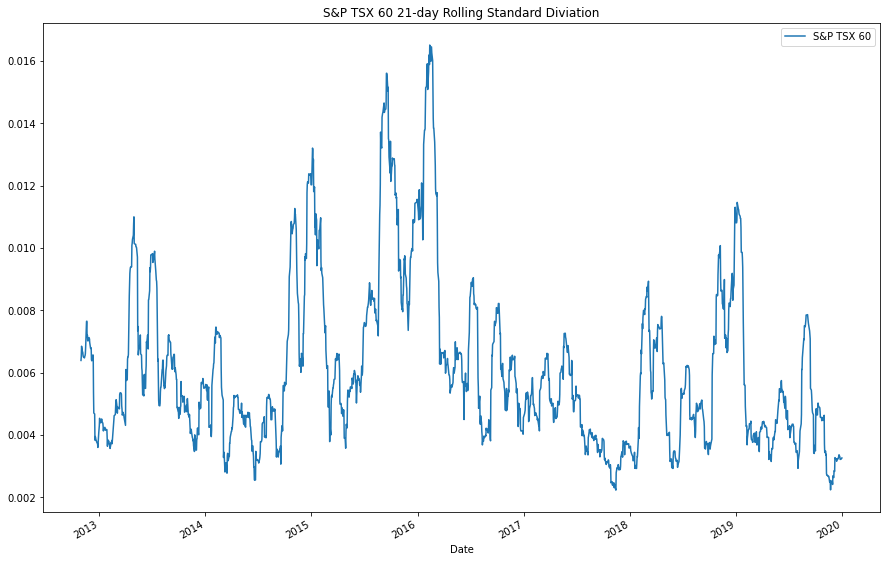

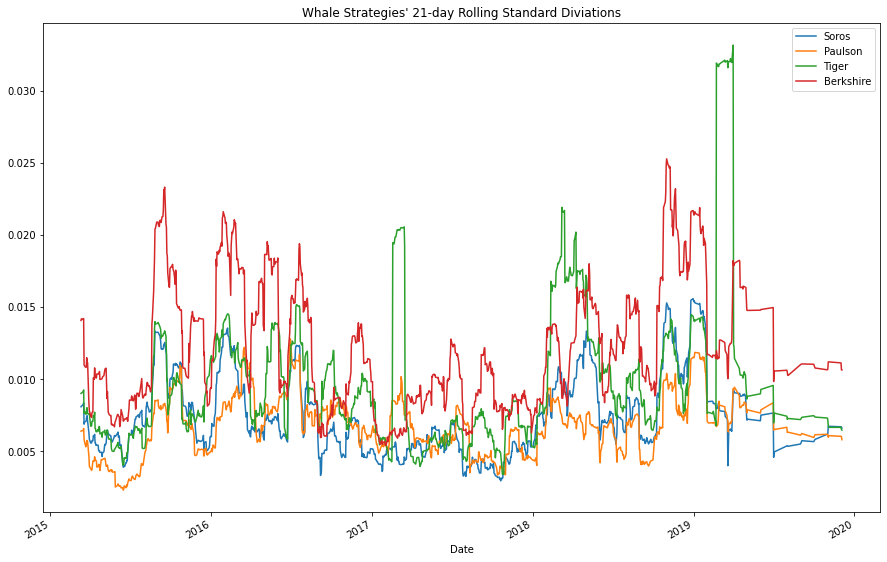

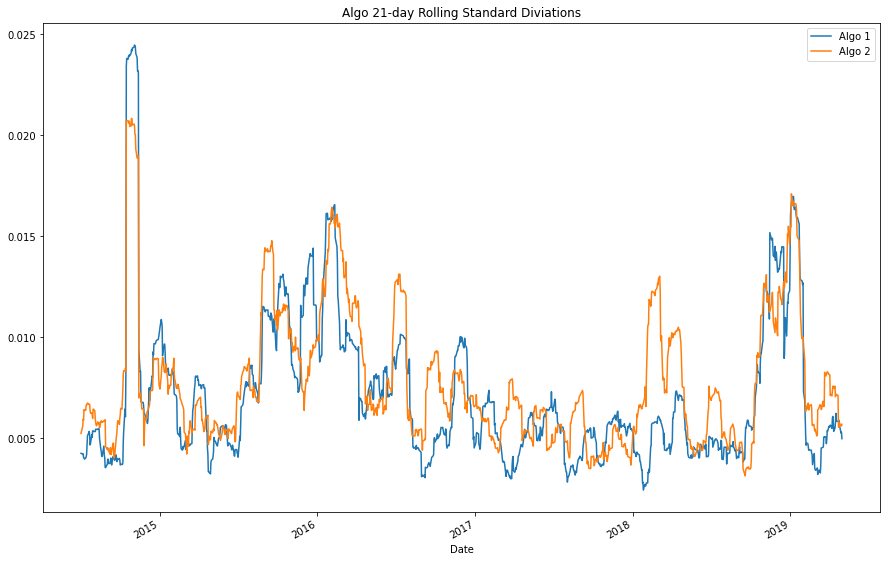

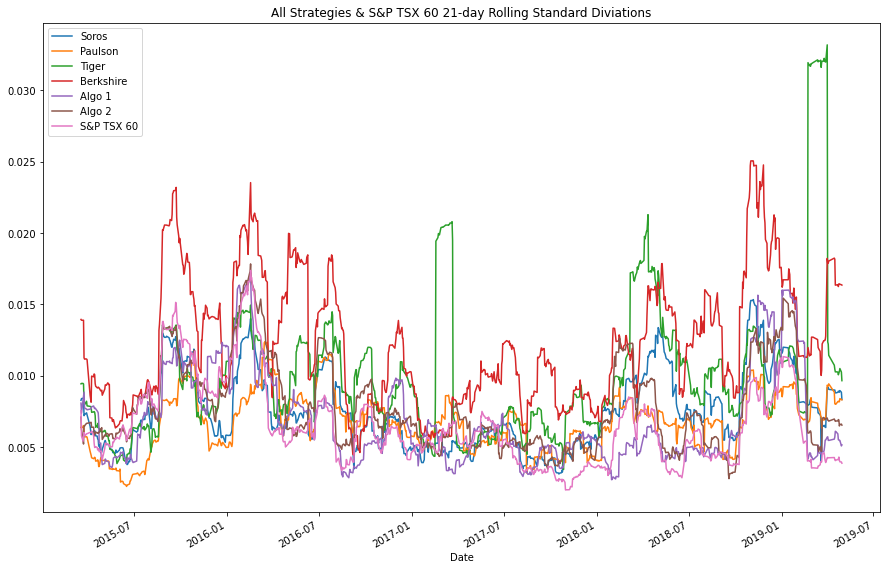

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

sp_tsx_std_21d_ma=sp_tsx_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
sp_tsx_std_21d_ma.plot(figsize=(15,10), title="S&P TSX 60 21-day Rolling Standard Diviation")

whale_std_21_ma=whale_returns_df.rolling(window=21).std()
whale_std_21_ma.plot(figsize=(15,10), title="Whale Strategies' 21-day Rolling Standard Diviations")

algo_std_21_ma=algo_returns_df.rolling(window=21).std()
algo_std_21_ma.plot(figsize=(15,10), title="Algo 21-day Rolling Standard Diviations")

combined_std_21_ma=combined_returns.rolling(window=21).std()
combined_std_21_ma.plot(figsize=(15,10), title="All Strategies & S&P TSX 60 21-day Rolling Standard Diviations")


### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation=combined_returns.corr()
# Display de correlation matrix
correlation

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P TSX 60
Soros,1.000000,0.707963,0.558281,0.754574,0.266481,0.592810,0.522596
Paulson,0.707963,1.000000,0.439721,0.563597,0.205575,0.465056,0.392112
Tiger,0.558281,0.439721,1.000000,0.410363,0.119904,0.365073,0.352908
Berkshire,0.754574,0.563597,0.410363,1.000000,0.226451,0.460978,0.424329
Algo 1,0.266481,0.205575,0.119904,0.226451,1.000000,0.277425,0.294740
Algo 2,0.592810,0.465056,0.365073,0.460978,0.277425,1.000000,0.740891
S&P TSX 60,0.522596,0.392112,0.352908,0.424329,0.294740,0.740891,1.000000


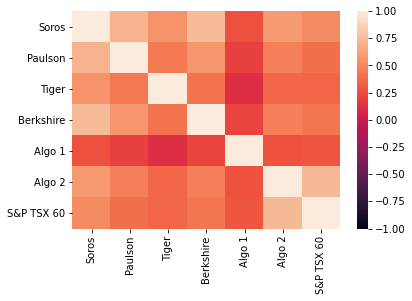

In [25]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [26]:
print(f"Algo 2 has the highest correlation with S&P TSX 60 and therefore may mimick the index more than any other strategy")

Algo 2 has the highest correlation with S&P TSX 60 and therefore may mimick the index more than any other strategy


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [27]:
# Calculate covariance of a single portfolio
Algo2_cov = combined_returns["Algo 2"].cov(combined_returns["S&P TSX 60"])
# Calculate variance of S&P TSX
SP_TSX_60_var = combined_returns["S&P TSX 60"].var()
# Computing beta
Algo2_beta = Algo2_cov / SP_TSX_60_var
print(f"The beta of Algo 2 with respect to S&P TSX 60 is {round(Algo2_beta,3)}.")


The beta of Algo 2 with respect to S&P TSX 60 is 0.871.


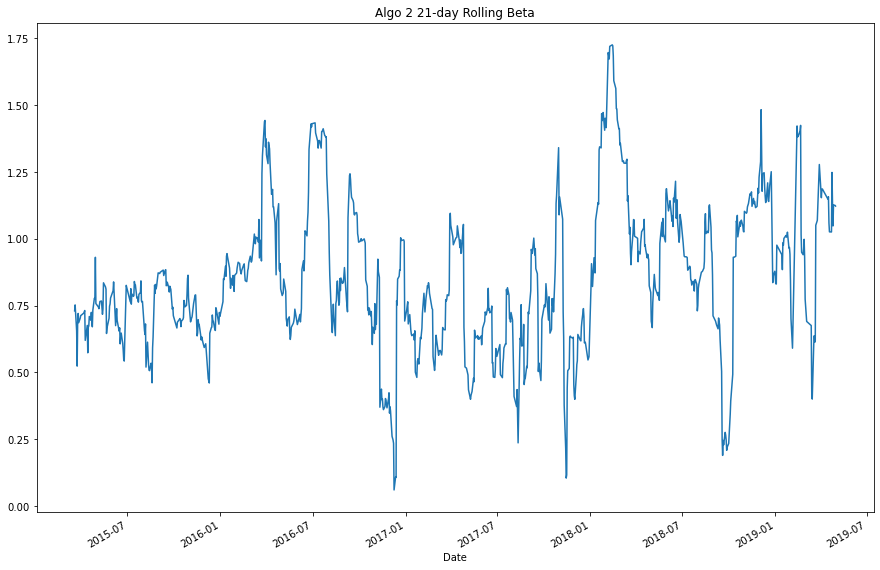

In [28]:
# Plot beta trend
Algo2_rolling_cov = combined_returns["Algo 2"].rolling(window=21).cov(combined_returns["S&P TSX 60"])
SP_TSX_60_rolling_var = combined_returns["S&P TSX 60"].rolling(window=21).var()
Algo2_rolling_beta = Algo2_rolling_cov / SP_TSX_60_rolling_var
Algo2_rolling_beta.plot(figsize=(15,10), title="Algo 2 21-day Rolling Beta")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

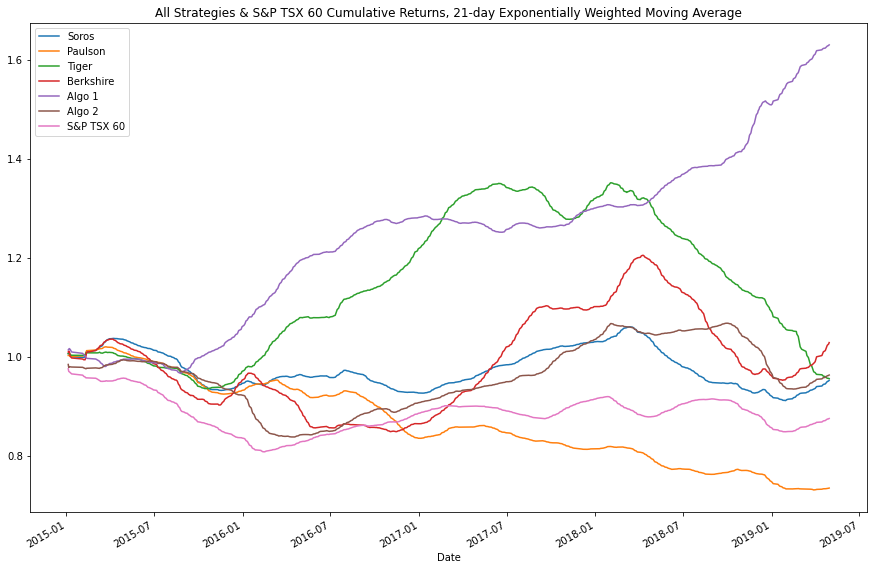

In [29]:
# Use `ewm` to calculate the rolling window
combined_cumulative_ret.ewm(halflife=21).mean().plot(figsize=(15,10), title = "All Strategies & S&P TSX 60 Cumulative Returns, 21-day Exponentially Weighted Moving Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / ann_return_vol
sharpe_ratios.sort_values(ascending=False)

Algo 1        1.240124
Berkshire     0.243828
Soros         0.040444
Algo 2        0.036006
Tiger        -0.001158
S&P TSX 60   -0.224149
Paulson      -0.690550
dtype: float64

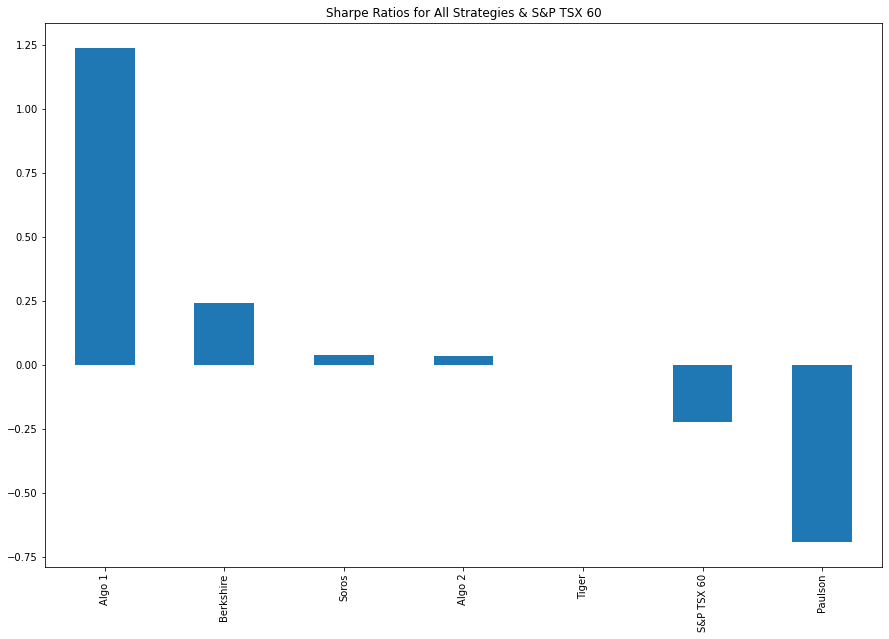

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.sort_values(ascending=False).plot.bar(figsize=(15,10), title = "Sharpe Ratios for All Strategies & S&P TSX 60")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.



In [32]:
print (f"Both Algo 1 and Algo 2 have outperformed the markets (S&P TSX 60) since their Sharpe ratios are higher than that of S&P TSX 60'.")
print (f"Moreover, Algo 1 has outperformed all other strategies since it has the highest Sharpe ratio out of all strategies.")

Both Algo 1 and Algo 2 have outperformed the markets (S&P TSX 60) since their Sharpe ratios are higher than that of S&P TSX 60'.
Moreover, Algo 1 has outperformed all other strategies since it has the highest Sharpe ratio out of all strategies.


---

In [ ]:
# Create Custom Portfolio

In this section, I uild  ownmy portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For my analysis, I downloaded data for three companies: Lululemon Athletica Inc.(LULU), Amazon.com, Inc. (AMZN) and JPMorgan Chase & Co. (JPM).


In [33]:
# Reading data from 1st stock
lulu_data=Path("lulu.csv")
lulu=pd.read_csv(lulu_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
lulu=lulu.sort_index()
lulu=lulu.drop(columns=["Open","High","Low","Close","Volume"])
lulu=lulu.rename(columns={"Adj Close": "LULU"})
lulu.head()

,LULU
Date,
2015-01-04,63.099998
2015-01-05,63.570000
2015-01-06,59.980000
2015-01-07,65.050003
2015-01-09,63.070000


In [34]:
# Reading data from 2nd stock
amzn_data=Path("amzn.csv")
amzn=pd.read_csv(amzn_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn=amzn.sort_index()
amzn=amzn.drop(columns=["Open","High","Low","Close","Volume"])
amzn=amzn.rename(columns={"Adj Close": "AMZN"})
amzn.head()

,AMZN
Date,
2015-01-04,370.260010
2015-01-05,422.869995
2015-01-06,430.920013
2015-01-07,437.390015
2015-01-09,496.540009


In [35]:
# Reading data from 3rd stock
jpm_data=Path("jpm.csv")
jpm=pd.read_csv(jpm_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
jpm=jpm.sort_index()
jpm=jpm.drop(columns=["Open","High","Low","Close","Volume"])
jpm=jpm.rename(columns={"Adj Close": "JPM"})
jpm.head()

,JPM
Date,
2015-01-04,51.079082
2015-01-05,54.197510
2015-01-06,56.302013
2015-01-07,58.376617
2015-01-09,52.699337


In [36]:
# Combine all stocks in a single DataFrame
shares=pd.concat([lulu,amzn,jpm], axis="columns", join="inner")
shares.head()

,LULU,AMZN,JPM
Date,,,
2015-01-04,63.099998,370.260010,51.079082
2015-01-05,63.570000,422.869995,54.197510
2015-01-06,59.980000,430.920013,56.302013
2015-01-07,65.050003,437.390015,58.376617
2015-01-09,63.070000,496.540009,52.699337


In [37]:
# Calculate daily returns
shares_daily_returns=shares.pct_change()

# Drop NAs
shares_daily_returns=shares_daily_returns.dropna()
# Display sample data
shares_daily_returns.head()

,LULU,AMZN,JPM
Date,,,
2015-01-05,0.007449,0.142089,0.061051
2015-01-06,-0.056473,0.019037,0.038830
2015-01-07,0.084528,0.015014,0.036848
2015-01-09,-0.030438,0.135234,-0.097253
2015-01-10,-0.202791,0.048697,-0.000488


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
share_portfolio_returns=shares_daily_returns.dot(weights)

# Display sample data
share_portfolio_returns.head()


Date
2015-01-05    0.070196
2015-01-06    0.000465
2015-01-07    0.045463
2015-01-09    0.002514
2015-01-10   -0.051527
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
all_returns=pd.concat([combined_returns,share_portfolio_returns], axis="columns", join="inner")
columns=["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P TSX 60", "MY STOCKS"]
all_returns.columns=columns
all_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P TSX 60,MY STOCKS
Date,,,,,,,,
2015-01-05,0.006051,0.002551,0.006526,0.009650,0.013712,-0.015621,-0.024465,0.070196
2015-01-06,0.002081,-0.000113,0.000837,0.002916,0.002307,-0.011984,-0.010139,0.000465
2015-01-07,-0.001365,0.002100,0.005815,-0.001304,0.003473,0.009418,0.002683,0.045463
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577,-0.009436,-0.001881,-0.005035,0.002514
2015-01-12,0.004271,0.010081,0.009055,0.010649,-0.019423,-0.002282,-0.008336,0.129447


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
all_returns_ann_vol=all_returns.std()*np.sqrt(252)

all_returns_ann_vol.sort_values()

Paulson       0.110912
S&P TSX 60    0.112926
Algo 1        0.120635
Soros         0.126407
Algo 2        0.132976
Tiger         0.176268
Berkshire     0.207050
MY STOCKS     0.836526
dtype: float64

In [41]:
print(f"MY STOCKS portfolio is riskier than all Whale and Algo porfolios as well as S&P TSX 60.")
print(f"MY STOCKS portfolio's annualized st.d. is {round(all_returns_ann_vol[7],2)}")

MY STOCKS portfolio is riskier than all Whale and Algo porfolios as well as S&P TSX 60.
MY STOCKS portfolio's annualized st.d. is 0.84


### Calculate and plot rolling `std` with 21-day window

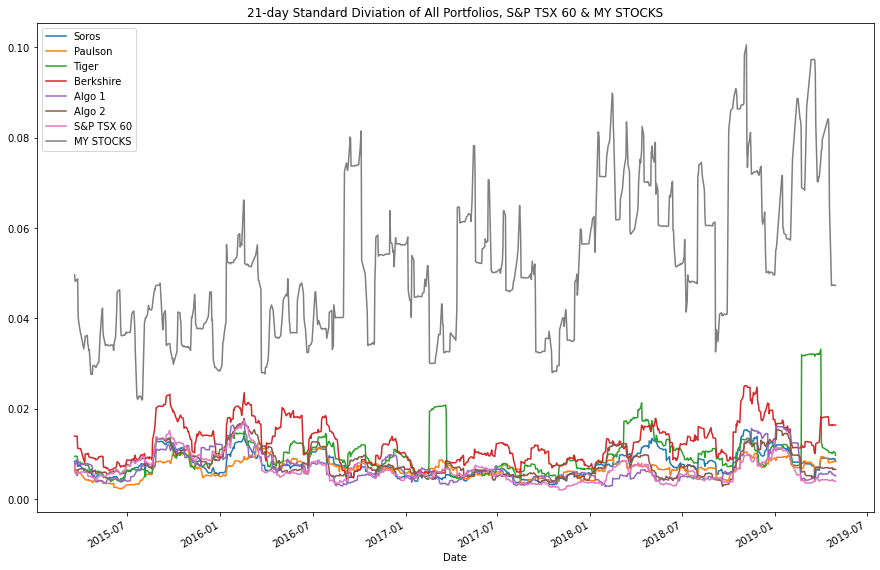

In [42]:
# Calculate rolling standard deviation
all_returns_21_ma_vol=all_returns.rolling(window=(21)).std()
# Plot rolling standard deviation
all_returns_21_ma_vol.plot(figsize=(15,10), title="21-day Standard Diviation of All Portfolios, S&P TSX 60 & MY STOCKS")

### Calculate and plot the correlation

In [43]:
# Calculate and plot the correlation
all_returns.corr()


,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P TSX 60,MY STOCKS
Soros,1.000000,0.707966,0.558281,0.754574,0.267173,0.593355,0.523847,0.159714
Paulson,0.707966,1.000000,0.439722,0.563601,0.205983,0.465549,0.393231,0.115033
Tiger,0.558281,0.439722,1.000000,0.410364,0.120212,0.365411,0.353759,0.103102
Berkshire,0.754574,0.563601,0.410364,1.000000,0.227075,0.461382,0.425292,0.110927
Algo 1,0.267173,0.205983,0.120212,0.227075,1.000000,0.277998,0.300129,0.007203
Algo 2,0.593355,0.465549,0.365411,0.461382,0.277998,1.000000,0.741935,0.098899
S&P TSX 60,0.523847,0.393231,0.353759,0.425292,0.300129,0.741935,1.000000,0.054806
MY STOCKS,0.159714,0.115033,0.103102,0.110927,0.007203,0.098899,0.054806,1.000000


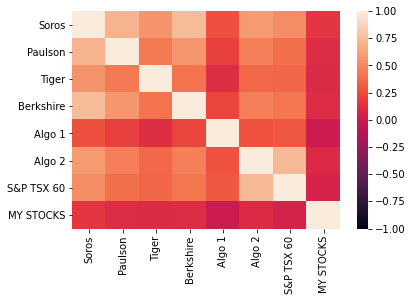

In [44]:
sns.heatmap(all_returns.corr(), vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

In [45]:
# Calculate and plot Beta
my_stocks_beta=all_returns["MY STOCKS"].cov(all_returns["S&P TSX 60"]) / all_returns["S&P TSX 60"].var()
print(f"MY STOCKS static beta with respect to S&P TSX 60 is {round(my_stocks_beta,2)}." )

MY STOCKS static beta with respect to S&P TSX 60 is 0.41.


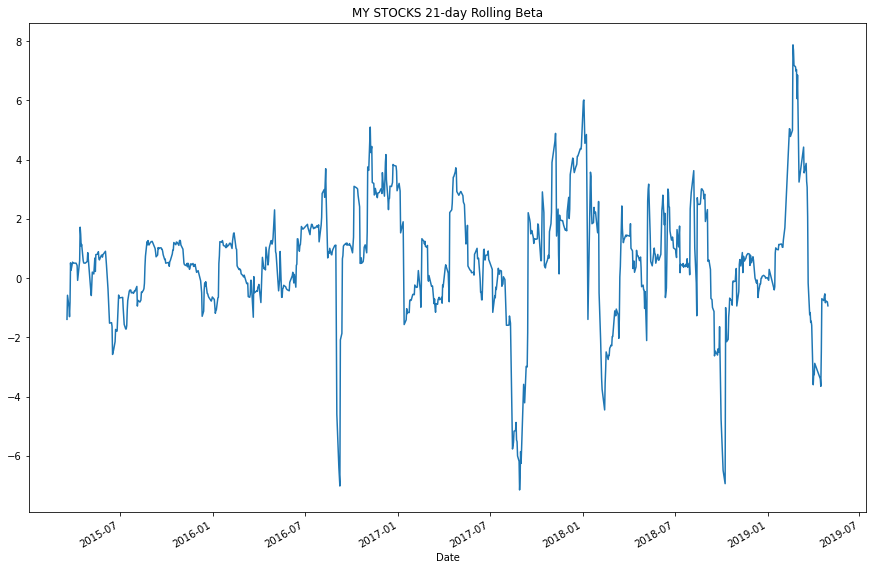

In [46]:
my_stocks_21d_rolling_beta = (all_returns["MY STOCKS"].rolling(window=(21)).cov(all_returns["S&P TSX 60"])) / (all_returns["S&P TSX 60"].rolling(window=(21)).var())
my_stocks_21d_rolling_beta.plot(figsize=(15,10), title="MY STOCKS 21-day Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
all_portf_sharpe_ratios = (all_returns.mean() * 252) / all_returns_ann_vol
all_portf_sharpe_ratios.sort_values(ascending=False)

Algo 1        1.197480
MY STOCKS     1.034593
Berkshire     0.244234
Algo 2        0.058412
Soros         0.040511
Tiger        -0.001160
S&P TSX 60   -0.161986
Paulson      -0.691704
dtype: float64

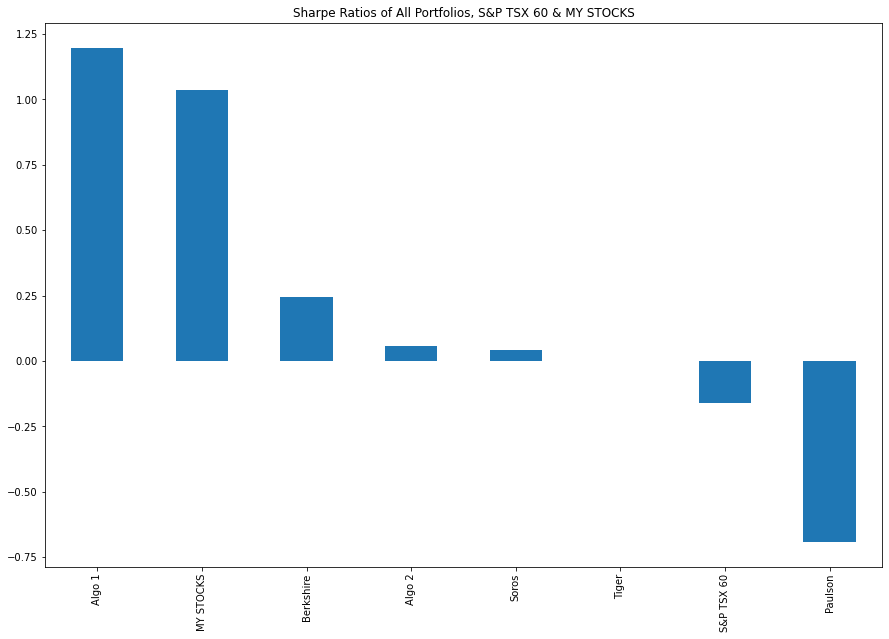

In [48]:
# Visualize the sharpe ratios as a bar plot
all_portf_sharpe_ratios.sort_values(ascending=False).plot.bar(figsize=(15,10), title = "Sharpe Ratios of All Portfolios, S&P TSX 60 & MY STOCKS")

### How did my portfolio do?



In [49]:
print(f"My portfolio 'MY STOCKS' has the 2nd highest Sharpe Ratio at {round(all_portf_sharpe_ratios[7],3)}.")

My portfolio 'MY STOCKS' has the 2nd highest Sharpe Ratio at 1.035.
